In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import random
import os
import matplotlib.image as mpimg
import pathlib

In [61]:
!ls /content/drive/MyDrive/orang/train/dwijuliandaffa

 DSCN6990~2.JPG		        IMG-20241012-WA0017.jpg
 DSCN7005~2.JPG		        IMG-20250128-WA0012~2.jpg
 DSCN7008~2.JPG		        IMG-20250128-WA0016~2.jpg
 IMG-20221027-WA0228~2.jpeg     IMG-20250128-WA0018~2.jpg
 IMG_20221028_223420.jpg        IMG-20250128-WA0020~2.jpg
 IMG_20221028_223814.jpg        IMG-20250128-WA0022~2.jpg
 IMG-20230131-WA0002.jpg        IMG-20250201-WA0010.jpg
 IMG-20230316-WA0006~2.jpg      IMG-20250201-WA0011.jpg
 IMG-20230630-WA0025~2.jpg      IMG-20250201-WA0015~2.jpg
 IMG-20230712-WA0024.jpg        IMG-20250212-WA0001~2.jpg
 IMG-20230831-WA0005~2.jpeg     IMG-20250212-WA0003~2.jpg
 IMG-20230906-WA0024~2.jpg      IMG-20250212-WA0005~2.jpg
 IMG-20230906-WA0031~2.jpg      IMG-20250217-WA0008~2.jpg
 IMG-20230906-WA0039~2.jpg      IMG-20250217-WA0010~2.jpg
 IMG-20230906-WA0051~2.jpg      IMG-20250217-WA0014~2.jpg
 IMG-20230906-WA0055.jpg        IMG-20250326-WA0008.jpg
 IMG-20230906-WA0057.jpg        IMG-20250327-WA0092~2.jpg
 IMG-20230906-WA0062.jpg        IMG-2025032

In [62]:
for dirpath, dirname, filename in os.walk("/content/drive/MyDrive/orang"):
  print(f'There are {len(filename)} images and {len(dirname)} in {dirpath}')

There are 0 images and 3 in /content/drive/MyDrive/orang
There are 0 images and 2 in /content/drive/MyDrive/orang/train
There are 71 images and 0 in /content/drive/MyDrive/orang/train/dwijuliandaffa
There are 71 images and 0 in /content/drive/MyDrive/orang/train/taufanali
There are 0 images and 2 in /content/drive/MyDrive/orang/val
There are 17 images and 0 in /content/drive/MyDrive/orang/val/dwijuliandaffa
There are 17 images and 0 in /content/drive/MyDrive/orang/val/taufanali
There are 4 images and 0 in /content/drive/MyDrive/orang/test


In [63]:
train_dir = "/content/drive/MyDrive/orang/train"
val_dir = "/content/drive/MyDrive/orang/val"

In [68]:
IMG_SIZE = (224, 224)

BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 batch_size=16,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical")

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                               batch_size=8,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical")

Found 142 files belonging to 2 classes.
Found 34 files belonging to 2 classes.


In [69]:
# Set checkpoint path
checkpoint_path = "model_checkpoints_weights/checkpoint.weights.h5"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [70]:
data_augmentation = tf.keras.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomFlip("horizontal"),
    layers.RandomBrightness(0.2),
    layers.RandomRotation(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2)
], name="data_augmentation")

In [71]:
input_shape=(224, 224, 3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(2, activation="softmax", name="output_layer")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=(val_data),
                    validation_steps=len(val_data),
                    callbacks=[checkpoint_callback])

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4884 - loss: 0.7252
Epoch 1: saving model to model_checkpoints_weights/checkpoint.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.5016 - loss: 0.7148 - val_accuracy: 0.9118 - val_loss: 0.3472
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9112 - loss: 0.3561
Epoch 2: saving model to model_checkpoints_weights/checkpoint.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 428ms/step - accuracy: 0.9081 - loss: 0.3551 - val_accuracy: 0.9412 - val_loss: 0.2078
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.8329 - loss: 0.2943
Epoch 3: saving model to model_checkpoints_weights/checkpoint.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - accuracy: 0.8376 - loss: 0.2914 - val_accuracy: 0.9412 - val_loss: 0.1665
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.9113 - loss: 0.2860
Epoch 4: saving model to model_checkpoints_weights/checkpoint.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/s

In [72]:
model.evaluate(val_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9237 - loss: 0.2488


[0.2631520628929138, 0.9117646813392639]

In [73]:
train_data.class_names

['dwijuliandaffa', 'taufanali']

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[0.64474875 0.35525128]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.09841071 0.90158933]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.00817971 0.99182034]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.9418821  0.05811797]]


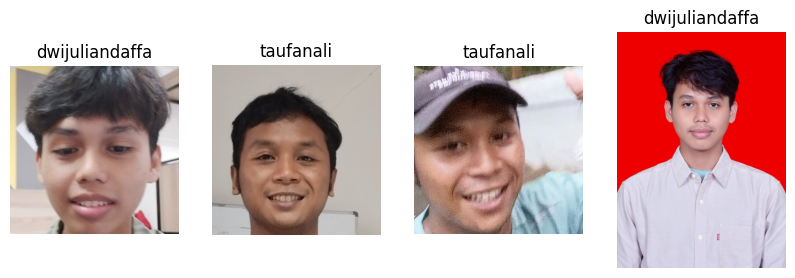

In [74]:
dir_test = "/content/drive/MyDrive/orang/test/"
class_person = train_data.class_names

plt.figure(figsize=(10, 8))
for num, img in enumerate(os.listdir(dir_test)):
  cvt_img = tf.io.read_file(dir_test+img)

  cvt_img = tf.image.decode_image(cvt_img)

  cvt_img = tf.image.resize(cvt_img, [224, 224])

  pred = model.predict(tf.expand_dims(cvt_img, axis=0))

  print(pred)
  label = class_person[int(tf.argmax(pred[0]))]
  plt.subplot(1, 4, num+1)
  img = mpimg.imread(dir_test+img)
  plt.imshow(img)
  plt.title(label)
  plt.axis(False)
  plt.grid(False)

In [ ]:
model.save("FaceRecognition.keras")

### finetuning

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_layer_8 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dw

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

fine_tune_epochs = 10

ft_model = model.fit(train_data,
                     epochs=fine_tune_epochs,
                     initial_epoch=history.epoch[-1],
                     validation_data=(val_data),
                     validation_steps=len(val_data))

Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9235 - loss: 0.2048

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[0.09106075 0.9089393 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[0.82473004 0.17526996]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[0.07020116 0.92979884]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[0.2894599 0.7105401]]


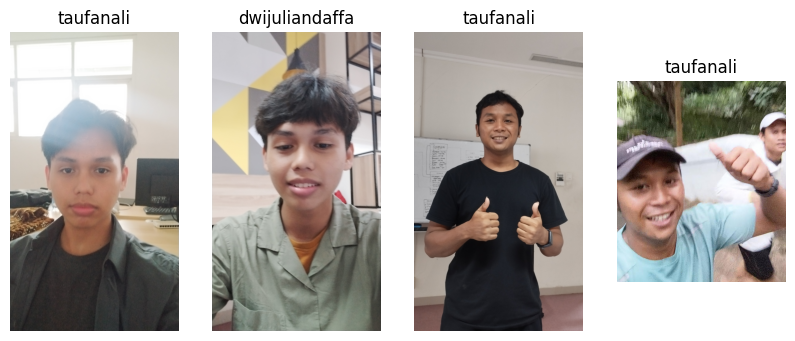

In [ ]:
dir_test = "/content/drive/MyDrive/orang/test/"
class_person = train_data.class_names

plt.figure(figsize=(10, 8))
for num, img in enumerate(os.listdir(dir_test)):
  cvt_img = tf.io.read_file(dir_test+img)

  cvt_img = tf.image.decode_image(cvt_img)

  cvt_img = tf.image.resize(cvt_img, [224, 224])

  pred = model.predict(tf.expand_dims(cvt_img, axis=0))

  print(pred)
  label = class_person[int(tf.argmax(pred[0]))]
  plt.subplot(1, 4, num+1)
  img = mpimg.imread(dir_test+img)
  plt.imshow(img)
  plt.title(label)
  plt.axis(False)
  plt.grid(False)

In [75]:
input_shape = (224, 224, 3)
vgg_model = tf.keras.applications.VGG16(include_top=False)
vgg_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

data_aug = data_augmentation(inputs)

x = vgg_model(data_aug, training=False)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(2, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=(val_data),
                        validation_steps=len(val_data))

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5060 - loss: 2.4205 - val_accuracy: 0.5882 - val_loss: 1.0589
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7988 - loss: 0.5700 - val_accuracy: 0.8235 - val_loss: 0.4209
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8236 - loss: 0.5029 - val_accuracy: 0.8824 - val_loss: 0.3553
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8687 - loss: 0.3450 - val_accuracy: 0.8235 - val_loss: 0.3786
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9045 - loss: 0.2416 - val_accuracy: 0.7941 - val_loss: 0.4181
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9229 - loss: 0.2784 - val_accuracy: 0.7941 - val_loss: 0.3967
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9534 - loss: 0.1019 - val_accuracy: 0.8235 - val_loss: 0.3996
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9492 - loss: 0.1831 - val_accuracy: 0.8235 - val_loss: 0.3871
Epoch 9/

In [76]:
model_2.evaluate(val_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7977 - loss: 0.4062


[0.400156170129776, 0.7941176295280457]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
[[9.997758e-01 2.241901e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.72335243 0.27664754]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.00323889 0.99676114]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[9.9984872e-01 1.5126663e-04]]


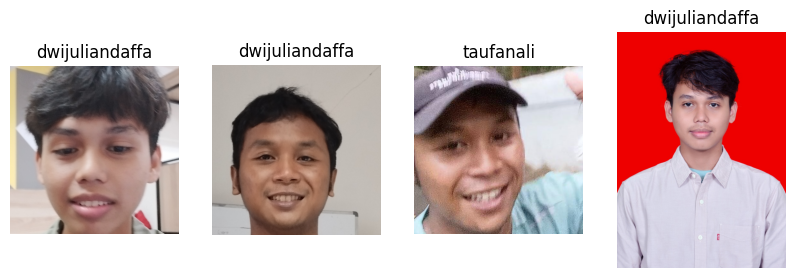

In [77]:
dir_test = "/content/drive/MyDrive/orang/test/"
class_person = train_data.class_names

plt.figure(figsize=(10, 8))
for num, img in enumerate(os.listdir(dir_test)):
  cvt_img = tf.io.read_file(dir_test+img)

  cvt_img = tf.image.decode_image(cvt_img)

  cvt_img = tf.image.resize(cvt_img, [224, 224])

  pred = model_2.predict(tf.expand_dims(cvt_img, axis=0))

  print(pred)
  label = class_person[int(tf.argmax(pred[0]))]
  plt.subplot(1, 4, num+1)
  img = mpimg.imread(dir_test+img)
  plt.imshow(img)
  plt.title(label)
  plt.axis(False)
  plt.grid(False)

In [ ]:
gmodel_2.save("FaceRecognition_10_data_train.keras")